In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


CARGA DEL DATASET Y ANÁLISIS

In [3]:
df_train = pd.read_csv("/content/drive/MyDrive/UTEC - Maestría de Especialización en Computer Science/2do Ciclo 2022 - 2/CS8127 - Machine Learning/Proyectos/Proyecto 2 - Clasificación/dataset/sign_mnist_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/UTEC - Maestría de Especialización en Computer Science/2do Ciclo 2022 - 2/CS8127 - Machine Learning/Proyectos/Proyecto 2 - Clasificación/dataset/sign_mnist_test.csv")

In [7]:
y_train = df_train.pop('label').values
X_train = df_train.values

y_test = df_test.pop('label').values
X_test = df_test.values

In [8]:
print("y_train =",y_train.shape,'\n')
print("X_train =",X_train.shape,'\n')
print("y_test =",y_test.shape,'\n')
print("X_test =",X_test.shape,'\n')

y_train = (27455,) 

X_train = (27455, 784) 

y_test = (7172,) 

X_test = (7172, 784) 



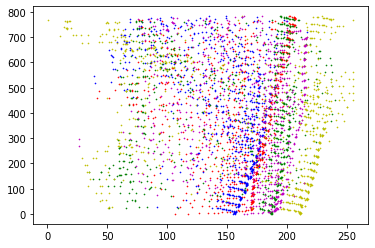

In [9]:
pixel_number = np.arange(0,784,1)

plt.scatter(X_train[0],pixel_number, s=0.4, c = 'r')
plt.scatter(X_train[1],pixel_number, s=0.4, c = 'b')
plt.scatter(X_train[2],pixel_number, s=0.4, c = 'g')
plt.scatter(X_train[3],pixel_number, s=0.4, c = 'y')
plt.scatter(X_train[4],pixel_number, s=0.4, c = 'm')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


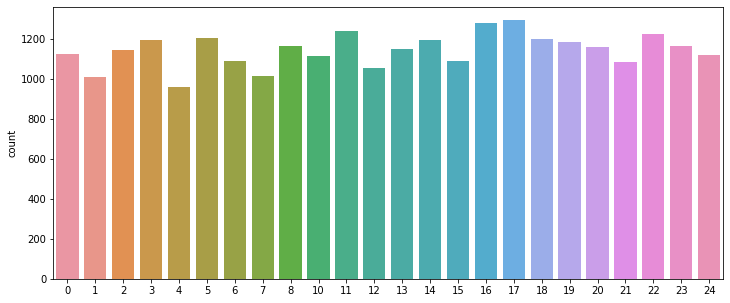

In [10]:
plt.figure(figsize = (12,5))
sns.countplot(y_train);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


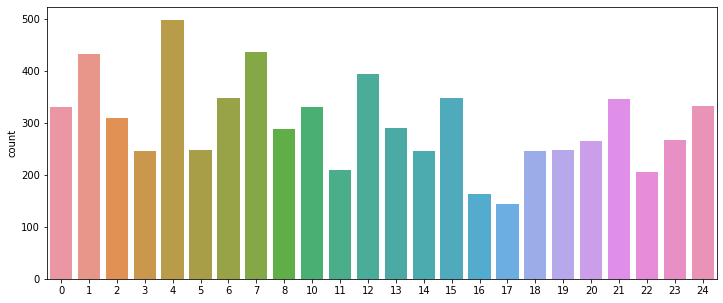

In [17]:
plt.figure(figsize = (12,5))
sns.countplot(y_test);

SELECCIÓN K

In [19]:
max_k = 30
f1_scores = list()
error_rates = list()

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')

    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_test,y_pred,average='macro')
    f1_scores.append((k, round(f1_score(y_test,y_pred,average='macro'), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1800x1200 with 0 Axes>

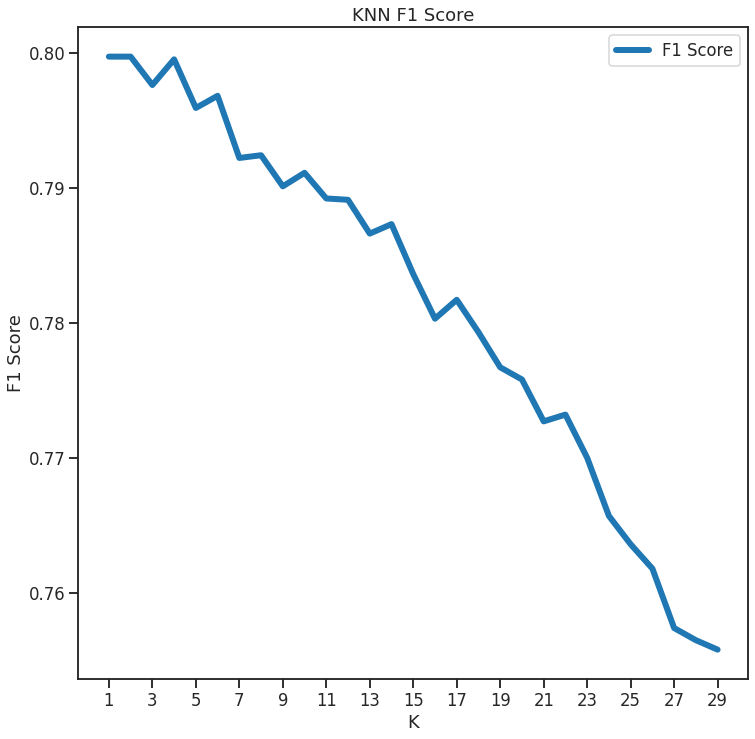

In [20]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1800x1200 with 0 Axes>

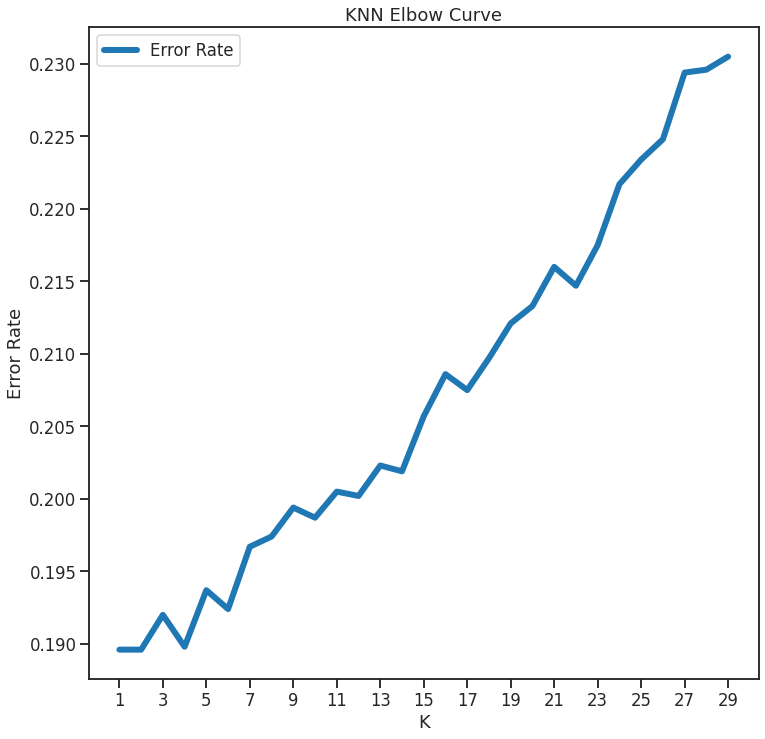

In [21]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')
### END SOLUTION

MODELO KNN

In [9]:
model = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='kd_tree')
classifier = model.fit(X_train,y_train)

In [11]:
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,average='macro')
cm = confusion_matrix(y_test, y_pred)
dfconfusion = pd.DataFrame(cm)
dfconfusion.columns = [np.unique(y_pred)]
dfconfusion.index = [np.unique(y_pred)]
print(acc)
print(f1)

0.8080033463469046
0.7976489359176715


In [ ]:
#Mapa de Confusión
plt.figure(figsize = (20,20))
sns.heatmap(dfconfusion,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='');

In [16]:
#Precisión
dfconfusion.iloc[9,9]/dfconfusion.iloc[9,:].sum()

0.5649546827794562

MÉTRICAS DEL MODELO

In [13]:
y_pred = classifier.predict(X_test)
#y_pred_df = pd.DataFrame(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       331
           1       0.96      0.93      0.95       432
           2       0.96      1.00      0.98       310
           3       0.81      0.95      0.87       245
           4       0.80      0.97      0.88       498
           5       0.93      0.91      0.92       247
           6       0.91      0.94      0.93       348
           7       0.96      0.94      0.95       436
           8       0.89      0.66      0.76       288
          10       0.83      0.58      0.68       331
          11       0.93      0.90      0.91       209
          12       0.78      0.52      0.62       394
          13       0.78      0.60      0.68       291
          14       1.00      0.91      0.95       246
          15       1.00      1.00      1.00       347
          16       0.95      1.00      0.98       164
          17       0.32      0.60      0.42       144
          18       0.65    

ENTRENAMIENTO K-FOLD CROSS VALIDATION

In [14]:
from sklearn.model_selection import cross_val_score

#Entrenamiento con 10 folds
cv_scores = cross_val_score(model, X_train, y_train, cv=10)

print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.99854334 0.9989075  0.99927167 1.         0.99927167 1.
 0.99781421 0.99817851 0.9996357  0.9989071 ]
cv_scores mean:0.9990529692468726


In [15]:
# Reentrenamiento
import sklearn
model = sklearn.base.clone(model)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3, weights='distance')

MÉTRICAS CON ENTRENAMIENTO K-FOLD

In [16]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       331
           1       0.96      0.93      0.95       432
           2       0.96      1.00      0.98       310
           3       0.81      0.95      0.87       245
           4       0.80      0.97      0.88       498
           5       0.93      0.91      0.92       247
           6       0.91      0.94      0.93       348
           7       0.96      0.94      0.95       436
           8       0.89      0.66      0.76       288
          10       0.83      0.58      0.68       331
          11       0.93      0.90      0.91       209
          12       0.78      0.52      0.62       394
          13       0.78      0.60      0.68       291
          14       1.00      0.91      0.95       246
          15       1.00      1.00      1.00       347
          16       0.95      1.00      0.98       164
          17       0.32      0.60      0.42       144
          18       0.65    